# Feature Selection

Feature selection… is the process of selecting a subset of relevant features for use in model construction


In [1]:
import sys
sys.path.append('/Users/griggles/Documents/FLATIRON/PROJECT_2')
from masseuse import Masseuse
m = Masseuse(csv_dir='/Users/griggles/Documents/FLATIRON/PROJECT_2/csv/')
data = m.build_data()
data.shape

/Users/griggles/Documents/FLATIRON/PROJECT_2/masseuse.py:90: FutureWarning: convert_objects is deprecated.  To re-infer data dtypes for object columns, use DataFrame.infer_objects()
For all other conversions use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  self.dfs['mf'] = self.dfs['mf'].convert_objects(convert_numeric=True)


(3920, 12)

## Top reasons to use feature selection are:
* It enables the machine learning algorithm to train faster.
* It reduces the complexity of a model and makes it easier to interpret.
* It improves the accuracy of a model if the right subset is chosen.
* It reduces overfitting.

In [2]:
#create dummy variables
#don't drop a category - just don't use intercept when modelling 
#to avoid multicollinearity (whatever that means)
import pandas as pd

df = pd.get_dummies(data, columns=['continent'])

## Types of Feature Selection

* Filter Methods
* Wrapper Methods
* Embedded Methods

In [3]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
from sklearn import metrics

#columns = "age sex bmi map tc ldl hdl tch ltg glu y".split() # Declare the columns names
#diabetes = datasets.load_diabetes() # Call the diabetes dataset from sklearn
#df = pd.read_csv('diabetes.tab.txt', sep='\t', lineterminator='\n')
#df.columns= columns
#features = df.iloc[:,:-1]
#target = df.y

features = df.iloc[:,1:]
target = df['fertility']

In [4]:
#features['female'] = pd.get_dummies(features['sex'],drop_first=True)
#features.drop(columns=['sex'], inplace=True)

In [5]:
features.head()

mort_rate_under_5  pop_percentage_above_65  \
Country Code Years                                               
ALB          1984                58.2                 5.390937   
             1985                54.0                 5.399862   
             1986                50.4                 5.413536   
             1987                47.2                 5.417392   
             1988                44.5                 5.423440   

                    mort_rate_infant  pop_percentage_under_14  \
Country Code Years                                              
ALB          1984               48.9                34.310923   
             1985               45.7                33.987349   
             1986               42.9                33.709853   
             1987               40.5                33.476210   
             1988               38.3                33.263863   

                    pop_percentage_15_to_64  life_expectancy     density  \
Country Code Years                                                         
ALB          1984                 60.298140           71.134  106.001058   
             1985                 60.612789           71.388  108.202993   
             1986                 60.876611           71.605  110.315146   
             1987                 61.106398           71.760  112.540328   
             1988                 61.312697           71.843  114.683796   

                           gdp  long term orientation  \
Country Code Years                                      
ALB          1984   662.520052                   61.0   
             1985   662.914793                   61.0   
             1986   719.157296                   61.0   
             1987   699.384292                   61.0   
             1988   676.566733                   61.0   

                    indulgence vs restraint  continent_Africa  \
Country Code Years                                              
ALB          1984                      15.0                 0   
             1985                      15.0                 0   
             1986                      15.0                 0   
             1987                      15.0                 0   
             1988                      15.0                 0   

                    continent_Americas  continent_Asia  continent_Europe  \
Country Code Years                                                         
ALB          1984                    0               0                 1   
             1985                    0               0                 1   
             1986                    0               0                 1   
             1987                    0               0                 1   
             1988                    0               0                 1   

                    continent_Oceania  
Country Code Years                     
ALB          1984                   0  
             1985                   0  
             1986                   0  
             1987                   0  
             1988                   0

In [6]:
X_train, X_test, y_train, y_test = train_test_split(features, target, random_state=32,test_size=0.2)


If you have multiple predictor variables in a regression, here is advice from Tabachnick & Fidell, Using Multivariate Statistics (k is the number of predictors)

a minimum N > 50 + (8*k) for tests of multiple R

a minimum N > 104 + k for tests of individual predictors

In [7]:
from sklearn import preprocessing
from sklearn import pipeline

scaler = preprocessing.StandardScaler()
scaler

StandardScaler(copy=True, with_mean=True, with_std=True)

In [8]:
scaler.fit(features)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [9]:
X_train.iloc[:,:-1]

,,mort_rate_under_5,pop_percentage_above_65,mort_rate_infant,pop_percentage_under_14,pop_percentage_15_to_64,life_expectancy,density,gdp,long term orientation,indulgence vs restraint,continent_Africa,continent_Americas,continent_Asia,continent_Europe
Country Code,Years,,,,,,,,,,,,,,
ARG,1983,34.7,8.457380,30.4,30.772815,60.769806,70.234000,10.762906,3530.131783,20.0,62.0,0,1,0,0
MKD,2012,10.4,11.906785,9.2,17.264069,70.829147,75.019000,82.237748,4698.689476,62.0,35.0,0,0,0,1
UGA,2008,88.8,2.295712,56.7,49.595811,48.108477,55.574000,158.470027,449.692818,24.0,52.0,1,0,0,0
DNK,1970,16.6,12.296033,13.9,23.290953,64.413015,73.343415,116.326575,3464.456995,35.0,70.0,0,0,0,1
THA,2012,12.1,9.492156,10.4,18.778020,71.729824,74.446000,132.795668,5859.887644,32.0,45.0,0,0,1,0
TZA,1990,165.5,2.710678,100.3,46.055673,51.233648,50.206000,28.741933,172.044798,34.0,38.0,1,0,0,0
MKD,2008,11.5,11.381083,10.2,18.750320,69.868597,74.305000,81.941260,4793.292959,62.0,35.0,0,0,0,1
ARG,1980,43.5,8.211141,37.5,30.326585,61.462274,69.464000,10.270030,2738.284723,20.0,62.0,0,1,0,0
IND,1972,205.9,3.411637,138.1,40.614341,55.974022,49.075000,194.878737,121.692289,51.0,26.0,0,0,1,0


In [10]:
scaler.fit(X_train.iloc[:,:-5])
features_scaled_train = pd.DataFrame(scaler.transform(X_train.iloc[:,:-5]), columns=X_train.columns[:-5], index=X_train.index)

#ADD BACK CATEGORICAL VARIABLES
#continent_Africa	continent_Americas	continent_Asia	continent_Europe

features_scaled_train['continent_Africa']= X_train.continent_Africa
features_scaled_train['continent_Americas']= X_train.continent_Americas
features_scaled_train['continent_Asia']= X_train.continent_Asia
features_scaled_train['continent_Europe']= X_train.continent_Europe
features_scaled_train['continent_Oceania']= X_train.continent_Oceania


features_scaled_train.head()


,,mort_rate_under_5,pop_percentage_above_65,mort_rate_infant,pop_percentage_under_14,pop_percentage_15_to_64,life_expectancy,density,gdp,long term orientation,indulgence vs restraint,continent_Africa,continent_Americas,continent_Asia,continent_Europe,continent_Oceania
Country Code,Years,,,,,,,,,,,,,,,
ARG,1983,-0.307779,-0.024773,-0.193960,0.075722,-0.106248,0.197515,-0.288228,-0.386477,-0.945554,0.628359,0,1,0,0,0
MKD,2012,-0.667287,0.637140,-0.719355,-1.147304,1.404883,0.672136,-0.171710,-0.309007,0.871127,-0.574762,0,0,0,1,0
UGA,2008,0.492606,-1.207148,0.457827,1.779877,-2.008253,-1.256602,-0.047437,-0.590696,-0.772536,0.182759,1,0,0,0,0
DNK,1970,-0.575561,0.711834,-0.602876,-0.601655,0.441041,0.505936,-0.116139,-0.390831,-0.296739,0.984839,0,0,0,1,0
THA,2012,-0.642136,0.173792,-0.689616,-1.010237,1.540184,0.615301,-0.089291,-0.232024,-0.426502,-0.129162,0,0,1,0,0


In [11]:
X_test.head()

,,mort_rate_under_5,pop_percentage_above_65,mort_rate_infant,pop_percentage_under_14,pop_percentage_15_to_64,life_expectancy,density,gdp,long term orientation,indulgence vs restraint,continent_Africa,continent_Americas,continent_Asia,continent_Europe,continent_Oceania
Country Code,Years,,,,,,,,,,,,,,,
DNK,1998,5.8,15.020549,4.8,18.043540,66.935912,76.139024,125.011053,33368.154851,35.0,70.0,0,0,0,1,0
PER,1989,85.0,3.939242,59.5,38.932739,57.128020,65.045000,16.694421,1052.913452,25.0,46.0,0,1,0,0,0
GHA,1997,108.1,2.998090,69.1,42.391503,54.610408,57.171000,77.387765,391.355680,4.0,72.0,1,0,0,0,0
ESP,1978,17.7,10.780642,14.8,26.673601,62.545757,74.295610,73.799167,4344.606706,48.0,44.0,0,0,0,1,0
SGP,1990,7.7,5.598826,6.2,21.460142,72.941032,75.295122,4547.958209,11864.280213,72.0,46.0,0,0,1,0,0


In [12]:
features_scaled_test = pd.DataFrame(scaler.transform(X_test.iloc[:,:-5]), columns=X_test.columns[:-5], index=X_test.index)

features_scaled_test['continent_Africa']= X_test.continent_Africa
features_scaled_test['continent_Americas']= X_test.continent_Americas
features_scaled_test['continent_Asia']= X_test.continent_Asia
features_scaled_test['continent_Europe']= X_test.continent_Europe
features_scaled_test['continent_Oceania']= X_test.continent_Oceania

features_scaled_test.head()

,,mort_rate_under_5,pop_percentage_above_65,mort_rate_infant,pop_percentage_under_14,pop_percentage_15_to_64,life_expectancy,density,gdp,long term orientation,indulgence vs restraint,continent_Africa,continent_Americas,continent_Asia,continent_Europe,continent_Oceania
Country Code,Years,,,,,,,,,,,,,,,
DNK,1998,-0.735342,1.234647,-0.828400,-1.076734,0.820034,0.783231,-0.101982,1.591649,-0.296739,0.984839,0,0,0,1,0
PER,1989,0.436387,-0.891768,0.527219,0.814487,-0.653323,-0.317179,-0.278558,-0.550705,-0.729282,-0.084602,0,1,0,0,0
GHA,1997,0.778141,-1.072367,0.765134,1.127629,-1.031523,-1.098197,-0.179616,-0.594563,-1.637623,1.073959,1,0,0,0,0
ESP,1978,-0.559287,0.421042,-0.580572,-0.295404,0.160538,0.600384,-0.185467,-0.332481,0.265567,-0.173722,0,0,0,1,0
SGP,1990,-0.707232,-0.573307,-0.793704,-0.767409,1.722133,0.699525,7.108260,0.166039,1.303671,-0.084602,0,0,1,0,0


In [13]:
poly = preprocessing.PolynomialFeatures(degree=2, interaction_only=False, include_bias=False)
features_135_train = pd.DataFrame(poly.fit_transform(features_scaled_train), index=features_scaled_train.index, columns=poly.get_feature_names(features_scaled_train.columns))
features_135_train.head()

,,mort_rate_under_5,pop_percentage_above_65,mort_rate_infant,pop_percentage_under_14,pop_percentage_15_to_64,life_expectancy,density,gdp,long term orientation,indulgence vs restraint,...,continent_Americas^2,continent_Americas continent_Asia,continent_Americas continent_Europe,continent_Americas continent_Oceania,continent_Asia^2,continent_Asia continent_Europe,continent_Asia continent_Oceania,continent_Europe^2,continent_Europe continent_Oceania,continent_Oceania^2
Country Code,Years,,,,,,,,,,,,,,,,,,,,,
ARG,1983,-0.307779,-0.024773,-0.193960,0.075722,-0.106248,0.197515,-0.288228,-0.386477,-0.945554,0.628359,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
MKD,2012,-0.667287,0.637140,-0.719355,-1.147304,1.404883,0.672136,-0.171710,-0.309007,0.871127,-0.574762,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
UGA,2008,0.492606,-1.207148,0.457827,1.779877,-2.008253,-1.256602,-0.047437,-0.590696,-0.772536,0.182759,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
DNK,1970,-0.575561,0.711834,-0.602876,-0.601655,0.441041,0.505936,-0.116139,-0.390831,-0.296739,0.984839,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
THA,2012,-0.642136,0.173792,-0.689616,-1.010237,1.540184,0.615301,-0.089291,-0.232024,-0.426502,-0.129162,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [14]:
pd.set_option('display.max_columns', 100)


In [15]:
features_135_train.head()

,,mort_rate_under_5,pop_percentage_above_65,mort_rate_infant,pop_percentage_under_14,pop_percentage_15_to_64,life_expectancy,density,gdp,long term orientation,indulgence vs restraint,continent_Africa,continent_Americas,continent_Asia,continent_Europe,continent_Oceania,mort_rate_under_5^2,mort_rate_under_5 pop_percentage_above_65,mort_rate_under_5 mort_rate_infant,mort_rate_under_5 pop_percentage_under_14,mort_rate_under_5 pop_percentage_15_to_64,mort_rate_under_5 life_expectancy,mort_rate_under_5 density,mort_rate_under_5 gdp,mort_rate_under_5 long term orientation,mort_rate_under_5 indulgence vs restraint,mort_rate_under_5 continent_Africa,mort_rate_under_5 continent_Americas,mort_rate_under_5 continent_Asia,mort_rate_under_5 continent_Europe,mort_rate_under_5 continent_Oceania,pop_percentage_above_65^2,pop_percentage_above_65 mort_rate_infant,pop_percentage_above_65 pop_percentage_under_14,pop_percentage_above_65 pop_percentage_15_to_64,pop_percentage_above_65 life_expectancy,pop_percentage_above_65 density,pop_percentage_above_65 gdp,pop_percentage_above_65 long term orientation,pop_percentage_above_65 indulgence vs restraint,pop_percentage_above_65 continent_Africa,pop_percentage_above_65 continent_Americas,pop_percentage_above_65 continent_Asia,pop_percentage_above_65 continent_Europe,pop_percentage_above_65 continent_Oceania,mort_rate_infant^2,mort_rate_infant pop_percentage_under_14,mort_rate_infant pop_percentage_15_to_64,mort_rate_infant life_expectancy,mort_rate_infant density,mort_rate_infant gdp,...,life_expectancy continent_Africa,life_expectancy continent_Americas,life_expectancy continent_Asia,life_expectancy continent_Europe,life_expectancy continent_Oceania,density^2,density gdp,density long term orientation,density indulgence vs restraint,density continent_Africa,density continent_Americas,density continent_Asia,density continent_Europe,density continent_Oceania,gdp^2,gdp long term orientation,gdp indulgence vs restraint,gdp continent_Africa,gdp continent_Americas,gdp continent_Asia,gdp continent_Europe,gdp continent_Oceania,long term orientation^2,long term orientation indulgence vs restraint,long term orientation continent_Africa,long term orientation continent_Americas,long term orientation continent_Asia,long term orientation continent_Europe,long term orientation continent_Oceania,indulgence vs restraint^2,indulgence vs restraint continent_Africa,indulgence vs restraint continent_Americas,indulgence vs restraint continent_Asia,indulgence vs restraint continent_Europe,indulgence vs restraint continent_Oceania,continent_Africa^2,continent_Africa continent_Americas,continent_Africa continent_Asia,continent_Africa continent_Europe,continent_Africa continent_Oceania,continent_Americas^2,continent_Americas continent_Asia,continent_Americas continent_Europe,continent_Americas continent_Oceania,continent_Asia^2,continent_Asia continent_Europe,continent_Asia continent_Oceania,continent_Europe^2,continent_Europe continent_Oceania,continent_Oceania^2
Country Code,Years,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
ARG,1983,-0.307779,-0.024773,-0.193960,0.075722,-0.106248,0.197515,-0.288228,-0.386477,-0.945554,0.628359,0.0,1.0,0.0,0.0,0.0,0.094728,0.007625,0.059697,-0.023306,0.032701,-0.060791,0.088710,0.118949,0.291022,-0.193396,-0.000000,-0.307779,-0.000000,-0.000000,-0.0,0.000614,0.004805,-0.001876,0.002632,-0.004893,0.007140,0.009574,0.023424,-0.015566,-0.000000,-0.024773,-0.000000,-0.000000,-0.0,0.037621,-0.014687,0.020608,-0.038310,0.055905,0.074961,...,0.000000,0.197515,0.000000,0.000000,0.0,0.083075,0.111393,0.272535,-0.181110,-0.000000,-0.288228,-0.000000,-0.000000,-0.0,0.149364,0.365434,-0.242846,-0.000000,-0.386477,-0.000000,-0.000000,-0.0,0.894072,-0.594147,-0.000000,-0.945554,-0.000000,-0.000000,-0.0,0.394835,0.000000,0.628359,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
MKD,2012,-0.667287,0.637140,-0.719355,-1.1

In [37]:
features_135_test = pd.DataFrame(poly.fit_transform(features_scaled_test), index=features_scaled_test.index, columns=poly.get_feature_names(features_scaled_test.columns))
features_135_test.head()

,,mort_rate_under_5,pop_percentage_above_65,mort_rate_infant,pop_percentage_under_14,pop_percentage_15_to_64,life_expectancy,density,gdp,long term orientation,indulgence vs restraint,continent_Africa,continent_Americas,continent_Asia,continent_Europe,continent_Oceania,mort_rate_under_5^2,mort_rate_under_5 pop_percentage_above_65,mort_rate_under_5 mort_rate_infant,mort_rate_under_5 pop_percentage_under_14,mort_rate_under_5 pop_percentage_15_to_64,mort_rate_under_5 life_expectancy,mort_rate_under_5 density,mort_rate_under_5 gdp,mort_rate_under_5 long term orientation,mort_rate_under_5 indulgence vs restraint,mort_rate_under_5 continent_Africa,mort_rate_under_5 continent_Americas,mort_rate_under_5 continent_Asia,mort_rate_under_5 continent_Europe,mort_rate_under_5 continent_Oceania,pop_percentage_above_65^2,pop_percentage_above_65 mort_rate_infant,pop_percentage_above_65 pop_percentage_under_14,pop_percentage_above_65 pop_percentage_15_to_64,pop_percentage_above_65 life_expectancy,pop_percentage_above_65 density,pop_percentage_above_65 gdp,pop_percentage_above_65 long term orientation,pop_percentage_above_65 indulgence vs restraint,pop_percentage_above_65 continent_Africa,pop_percentage_above_65 continent_Americas,pop_percentage_above_65 continent_Asia,pop_percentage_above_65 continent_Europe,pop_percentage_above_65 continent_Oceania,mort_rate_infant^2,mort_rate_infant pop_percentage_under_14,mort_rate_infant pop_percentage_15_to_64,mort_rate_infant life_expectancy,mort_rate_infant density,mort_rate_infant gdp,...,life_expectancy continent_Africa,life_expectancy continent_Americas,life_expectancy continent_Asia,life_expectancy continent_Europe,life_expectancy continent_Oceania,density^2,density gdp,density long term orientation,density indulgence vs restraint,density continent_Africa,density continent_Americas,density continent_Asia,density continent_Europe,density continent_Oceania,gdp^2,gdp long term orientation,gdp indulgence vs restraint,gdp continent_Africa,gdp continent_Americas,gdp continent_Asia,gdp continent_Europe,gdp continent_Oceania,long term orientation^2,long term orientation indulgence vs restraint,long term orientation continent_Africa,long term orientation continent_Americas,long term orientation continent_Asia,long term orientation continent_Europe,long term orientation continent_Oceania,indulgence vs restraint^2,indulgence vs restraint continent_Africa,indulgence vs restraint continent_Americas,indulgence vs restraint continent_Asia,indulgence vs restraint continent_Europe,indulgence vs restraint continent_Oceania,continent_Africa^2,continent_Africa continent_Americas,continent_Africa continent_Asia,continent_Africa continent_Europe,continent_Africa continent_Oceania,continent_Americas^2,continent_Americas continent_Asia,continent_Americas continent_Europe,continent_Americas continent_Oceania,continent_Asia^2,continent_Asia continent_Europe,continent_Asia continent_Oceania,continent_Europe^2,continent_Europe continent_Oceania,continent_Oceania^2
Country Code,Years,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
DNK,1998,-0.735342,1.234647,-0.828400,-1.076734,0.820034,0.783231,-0.101982,1.591649,-0.296739,0.984839,0.0,0.0,0.0,1.0,0.0,0.540728,-0.907887,0.609157,0.791767,-0.603006,-0.575942,0.074991,-1.170406,0.218205,-0.724194,-0.000000,-0.000000,-0.000000,-0.735342,-0.0,1.524352,-1.022781,-1.329386,1.012453,0.967013,-0.125911,1.965124,-0.366368,1.215929,0.000000,0.000000,0.000000,1.234647,0.0,0.686246,0.891966,-0.679316,-0.648828,0.084481,-1.318522,...,0.000000,0.000000,0.000000,0.783231,0.0,0.010400,-0.162319,0.030262,-0.100435,-0.000000,-0.000000,-0.00000,-0.101982,-0.0,2.533346,-0.472304,1.567518,0.000000,0.000000,0.000000,1.591649,0.0,0.088054,-0.292240,-0.000000,-0.000000,-0.000000,-0.296739,-0.0,0.969909,0.000000,0.000000,0.000000,0.984839,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
PER,1989,0.436387,-0.891768,0.527219,0.814487,-0.6

# Filter Methods
Filter feature selection methods apply a statistical measure to assign a scoring to each feature. The features are ranked by the score and either selected to be kept or removed from the dataset. The methods are often univariate and consider the feature independently, or with regard to the dependent variable.

![alt text](Filter_1.png)

**Examples:** 
* F-Test
* Chi squared test 
* Information gain 
* Correlation coefficient scores

![alt text](FS1.webp)

In [17]:
from sklearn.feature_selection import VarianceThreshold


In [18]:
thresholder = VarianceThreshold(threshold=.5)

def variance_threshold_selector(data, threshold=0.5):
    selector = VarianceThreshold(threshold)
    selector.fit(data)
    return data[data.columns[selector.get_support(indices=True)]]

In [19]:
#REMOVE LOW VARIANCE VARIABLES

features_selected_train = variance_threshold_selector(features_135_train)

In [20]:
features_selected_train.head()

,,mort_rate_under_5,pop_percentage_above_65,mort_rate_infant,pop_percentage_under_14,pop_percentage_15_to_64,life_expectancy,density,gdp,long term orientation,indulgence vs restraint,mort_rate_under_5^2,mort_rate_under_5 pop_percentage_above_65,mort_rate_under_5 mort_rate_infant,mort_rate_under_5 pop_percentage_under_14,mort_rate_under_5 pop_percentage_15_to_64,mort_rate_under_5 life_expectancy,mort_rate_under_5 density,mort_rate_under_5 gdp,mort_rate_under_5 long term orientation,mort_rate_under_5 indulgence vs restraint,mort_rate_under_5 continent_Africa,pop_percentage_above_65^2,pop_percentage_above_65 mort_rate_infant,pop_percentage_above_65 pop_percentage_under_14,pop_percentage_above_65 pop_percentage_15_to_64,pop_percentage_above_65 life_expectancy,pop_percentage_above_65 gdp,pop_percentage_above_65 long term orientation,pop_percentage_above_65 indulgence vs restraint,mort_rate_infant^2,mort_rate_infant pop_percentage_under_14,mort_rate_infant pop_percentage_15_to_64,mort_rate_infant life_expectancy,mort_rate_infant density,mort_rate_infant gdp,mort_rate_infant long term orientation,mort_rate_infant indulgence vs restraint,pop_percentage_under_14^2,pop_percentage_under_14 pop_percentage_15_to_64,pop_percentage_under_14 life_expectancy,pop_percentage_under_14 density,pop_percentage_under_14 gdp,pop_percentage_under_14 long term orientation,pop_percentage_under_14 indulgence vs restraint,pop_percentage_15_to_64^2,pop_percentage_15_to_64 life_expectancy,pop_percentage_15_to_64 density,pop_percentage_15_to_64 gdp,pop_percentage_15_to_64 long term orientation,pop_percentage_15_to_64 indulgence vs restraint,life_expectancy^2,life_expectancy density,life_expectancy gdp,life_expectancy long term orientation,life_expectancy indulgence vs restraint,density^2,density gdp,density long term orientation,density continent_Asia,gdp^2,gdp long term orientation,gdp indulgence vs restraint,gdp continent_Europe,long term orientation^2,long term orientation indulgence vs restraint,indulgence vs restraint^2
Country Code,Years,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
ARG,1983,-0.307779,-0.024773,-0.193960,0.075722,-0.106248,0.197515,-0.288228,-0.386477,-0.945554,0.628359,0.094728,0.007625,0.059697,-0.023306,0.032701,-0.060791,0.088710,0.118949,0.291022,-0.193396,-0.000000,0.000614,0.004805,-0.001876,0.002632,-0.004893,0.009574,0.023424,-0.015566,0.037621,-0.014687,0.020608,-0.038310,0.055905,0.074961,0.183400,-0.121877,0.005734,-0.008045,0.014956,-0.021825,-0.029265,-0.071599,0.047580,0.011289,-0.020986,0.030624,0.041062,0.100463,-0.066762,0.039012,-0.056929,-0.076335,-0.186761,0.124110,0.083075,0.111393,0.272535,-0.000000,0.149364,0.365434,-0.242846,-0.000000,0.894072,-0.594147,0.394835
MKD,2012,-0.667287,0.637140,-0.719355,-1.147304,1.404883,0.672136,-0.171710,-0.309007,0.871127,-0.574762,0.445272,-0.425155,0.480017,0.765581,-0.937460,-0.448508,0.114580,0.206196,-0.581292,0.383531,-0.000000,0.405948,-0.458330,-0.730993,0.895107,0.428245,-0.196881,0.555030,-0.366204,0.517472,0.825319,-1.010610,-0.483505,0.123521,0.222286,-0.626650,0.413458,1.316306,-1.611827,-0.771144,0.197004,0.354524,-0.999448,0.659427,1.973695,0.944272,-0.241233,-0.434118,1.223832,-0.807473,0.451767,-0.115413,-0.207695,0.585516,-0.386318,0.029484,0.053060,-0.149581,-0.000000,0.095485,-0.269184,0.177605,-0.309007,0.758863,-0.500691,0.330351
UGA,2008,0.492606,-1.207148,0.457827,1.779877,-2.008253,-1.256602,-0.047437,-0.590696,-0.772536,0.182759,0.242661,-0.594649,0.225529,0.876779,-0.989278,-0.619010,-0.023368,-0.290981,-0.380556,0.090028,0.492606,1.457206,-0.552665,-2.148575,2.424258,1.516905,0.713057,0.932566,-0.220617,0.209606,0.814877,-0.919433,-0.575307,-0.021718,-0.270437,-0.353688,0.083672,3.167963,-3.574444,-2.236598,-0.084432,-1.051366,-1.375020,0.325288,4.033080,2.523575,0.095266,1.186267,1.551448,-0.367026,1.579049,0.059609,0.742270,0.970771,-0.229655,0.002250,0.028021,0.036647,-0.000000,0.348922,0.456334,-0.107955,-0.000000,0.596812,-0.1

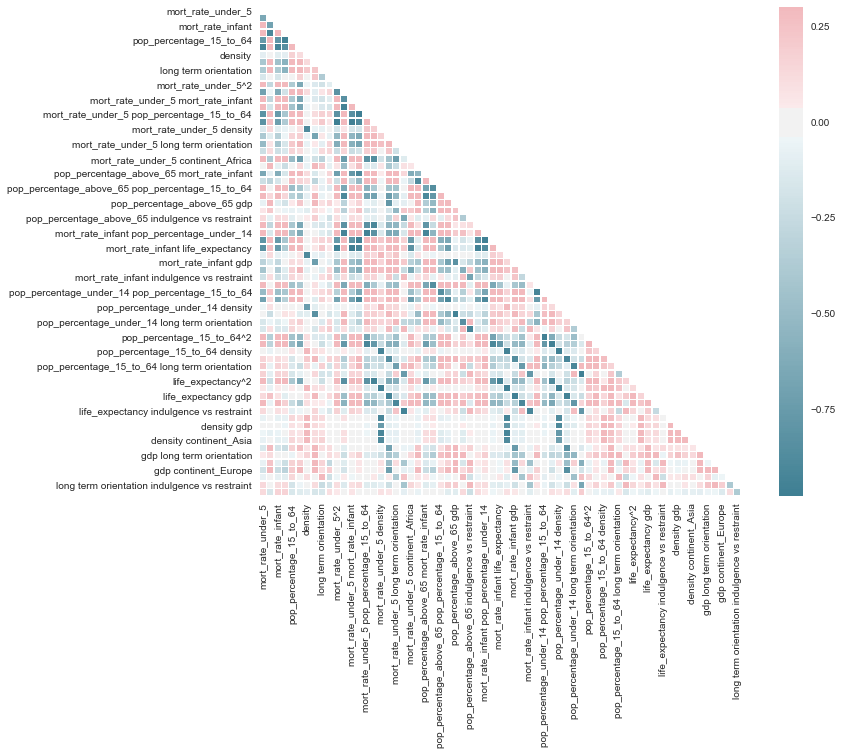

In [21]:
import seaborn as sns

sns.set(style="white")


# Compute the correlation matrix
corr = features_selected_train.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": 1})

In [22]:
# Create correlation matrix
corr_matrix = features_selected_train.corr().abs()

# Select upper triangle of correlation matrix (so as not to include self-correlations of 1)
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# Find index of feature columns with correlation greater than 0.95
to_drop = [column for column in upper.columns if any(upper[column] > 0.95)]

In [23]:
def calculate_cols_to_drop(upper):
    #to_drop = [column for column in upper.columns if any(upper[column] > 0.95)]
    shape = upper.shape
    print(shape)
    row_index = upper.index
    col_index = upper.columns
    to_drop = []
    
    for row in range(0, shape[0]):
        for col in range(0, shape[1]):
            #print(upper.iloc[row,col])
            if upper.iloc[row, col] > 0.95:
                if row_index[row] in to_drop or col_index[col] in to_drop:
                    pass
                else:
                    to_drop.append(col_index[col])
    
    temp = upper.drop(index= to_drop, columns=to_drop)
    
    print(len(to_drop))
    
    shape = temp.shape
    for row in range(0, shape[0]):
        for col in range(0, shape[1]):
            if temp.iloc[row, col] > 0.95:
                print("IT DIDN'T FUCKING WORK")
                print('row: ' + temp.index[row])
                print('col: ' + temp.columns[col])
            
    return to_drop

corr_removed = calculate_cols_to_drop(upper)

print(len([column for column in upper.columns if any(upper[column] > 0.95)]))
corr_removed
print(len(corr_removed))

(66, 66)
19
22
19


In [24]:
upper

,mort_rate_under_5,pop_percentage_above_65,mort_rate_infant,pop_percentage_under_14,pop_percentage_15_to_64,life_expectancy,density,gdp,long term orientation,indulgence vs restraint,mort_rate_under_5^2,mort_rate_under_5 pop_percentage_above_65,mort_rate_under_5 mort_rate_infant,mort_rate_under_5 pop_percentage_under_14,mort_rate_under_5 pop_percentage_15_to_64,mort_rate_under_5 life_expectancy,mort_rate_under_5 density,mort_rate_under_5 gdp,mort_rate_under_5 long term orientation,mort_rate_under_5 indulgence vs restraint,mort_rate_under_5 continent_Africa,pop_percentage_above_65^2,pop_percentage_above_65 mort_rate_infant,pop_percentage_above_65 pop_percentage_under_14,pop_percentage_above_65 pop_percentage_15_to_64,pop_percentage_above_65 life_expectancy,pop_percentage_above_65 gdp,pop_percentage_above_65 long term orientation,pop_percentage_above_65 indulgence vs restraint,mort_rate_infant^2,mort_rate_infant pop_percentage_under_14,mort_rate_infant pop_percentage_15_to_64,mort_rate_infant life_expectancy,mort_rate_infant density,mort_rate_infant gdp,mort_rate_infant long term orientation,mort_rate_infant indulgence vs restraint,pop_percentage_under_14^2,pop_percentage_under_14 pop_percentage_15_to_64,pop_percentage_under_14 life_expectancy,pop_percentage_under_14 density,pop_percentage_under_14 gdp,pop_percentage_under_14 long term orientation,pop_percentage_under_14 indulgence vs restraint,pop_percentage_15_to_64^2,pop_percentage_15_to_64 life_expectancy,pop_percentage_15_to_64 density,pop_percentage_15_to_64 gdp,pop_percentage_15_to_64 long term orientation,pop_percentage_15_to_64 indulgence vs restraint,life_expectancy^2,life_expectancy density,life_expectancy gdp,life_expectancy long term orientation,life_expectancy indulgence vs restraint,density^2,density gdp,density long term orientation,density continent_Asia,gdp^2,gdp long term orientation,gdp indulgence vs restraint,gdp continent_Europe,long term orientation^2,long term orientation indulgence vs restraint,indulgence vs restraint^2
mort_rate_under_5,NaN,0.651831,0.983094,0.769776,0.766969,0.935943,0.095041,0.412181,0.381919,0.157315,0.800991,0.706393,0.826126,0.808095,0.821648,0.813468,0.130279,0.391103,0.504012,0.218228,0.791113,0.038234,0.655707,0.217022,0.430335,0.526457,0.072498,0.062844,0.125542,0.820712,0.783283,0.803461,0.827819,0.091231,0.309791,0.423700,0.200559,0.425996,0.502843,0.693530,0.045532,0.035193,0.158517,0.157695,0.477920,0.735479,0.000620,0.152856,0.199065,0.166472,0.750358,0.059120,0.127989,0.432804,0.123108,0.070893,0.024423,0.045599,0.073175,0.153688,0.045588,0.078065,0.197181,0.071784,0.131652,0.126578
pop_percentage_above_65,NaN,NaN,0.697762,0.910730,0.728284,0.743109,0.017976,0.619553,0.496175,0.015997,0.270917,0.043387,0.278617,0.170752,0.299632,0.263822,0.128593,0.110782,0.066093,0.114984,0.359913,0.494353,0.094860,0.299800,0.011156,0.134072,0.348168,0.217089,0.081941,0.277039,0.145305,0.293863,0.259392,0.115003,0.148414,0.024817,0.110123,0.016654,0.239628,0.128672,0.088881,0.235178,0.061006,0.095859,0.351556,0.300635,0.065781,0.071001,0.072165,0.096963,0.226487,0.074011,0.246116,0.065478,0.024660,0.014307,0.000834,0.082352,0.029105,0.287741,0.114677,0.237307,0.399986,0.031111,0.037827,0.161318
mort_rate_infant,NaN,NaN,NaN,0.807509,0.793621,0.932367,0.100764,0.457631,0.388419,0.166092,0.710773,0.625032,0.759589,0.728834,0.748957,0.717788,0.102070,0.329670,0.420978,0.209549,0.691144,0.079683,0.603437,0.171841,0.393419,0.448817,0.103357,0.023446,0.125624,0.783166,0.732858,0.758465,0.755036,0.072687,0.270640,0.356531,0.212142,0.383614,0.469648,0.614585,0.035420,0.001461,0.116319,0.152937,0.451242,0.664307,0.011507,0.120893,0.163556,0.158539,0.654276,0.040254,0.075529,0.359971,0.103812,0.079799,0.031076,0.056133,0.082941,0.176455,0.021034,0.093589,0.229142,0.080069,0.116199,0.163312
pop_percentage_under_14,NaN,NaN,NaN,NaN,0.946291,0.839076,0.094108,0.563838,0.566120,0.000061,0.355111,0.195649,0.372259,0.342166,0.415577,0.369929,0.059911,0.044

In [25]:
to_drop = [column for column in upper.columns if any(upper[column] > 0.95)]
print(len(to_drop))

22


In [26]:
#DROP HIGHLY CORRELATED COLUMNS TO REDUCE MODEL COMPLEXITY

features_selected_train.drop(columns=corr_removed, inplace=True)

/anaconda3/lib/python3.6/site-packages/pandas/core/frame.py:3694: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [27]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression, mutual_info_regression



In [28]:
def information_selector(X, y, scoring, k=5):
    selector = SelectKBest(score_func=scoring, k=k)
    selector.fit(X, y)
    return X[X.columns[selector.get_support(indices=True)]]

In [29]:
test = SelectKBest(score_func=mutual_info_regression, k=30)
fit = test.fit(features_selected_train, y_train)

In [30]:
features_selected_train[features_selected_train.columns[fit.get_support(indices=True)]].head()

,,mort_rate_under_5,pop_percentage_above_65,pop_percentage_under_14,pop_percentage_15_to_64,life_expectancy,long term orientation,indulgence vs restraint,mort_rate_under_5^2,mort_rate_under_5 pop_percentage_under_14,mort_rate_under_5 density,mort_rate_under_5 long term orientation,mort_rate_under_5 indulgence vs restraint,pop_percentage_above_65^2,pop_percentage_above_65 pop_percentage_under_14,pop_percentage_above_65 pop_percentage_15_to_64,pop_percentage_above_65 gdp,pop_percentage_above_65 long term orientation,pop_percentage_above_65 indulgence vs restraint,pop_percentage_under_14^2,pop_percentage_under_14 pop_percentage_15_to_64,pop_percentage_under_14 life_expectancy,pop_percentage_under_14 density,pop_percentage_under_14 gdp,pop_percentage_under_14 long term orientation,pop_percentage_under_14 indulgence vs restraint,pop_percentage_15_to_64 gdp,pop_percentage_15_to_64 long term orientation,long term orientation^2,long term orientation indulgence vs restraint,indulgence vs restraint^2
Country Code,Years,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
ARG,1983,-0.307779,-0.024773,0.075722,-0.106248,0.197515,-0.945554,0.628359,0.094728,-0.023306,0.088710,0.291022,-0.193396,0.000614,-0.001876,0.002632,0.009574,0.023424,-0.015566,0.005734,-0.008045,0.014956,-0.021825,-0.029265,-0.071599,0.047580,0.041062,0.100463,0.894072,-0.594147,0.394835
MKD,2012,-0.667287,0.637140,-1.147304,1.404883,0.672136,0.871127,-0.574762,0.445272,0.765581,0.114580,-0.581292,0.383531,0.405948,-0.730993,0.895107,-0.196881,0.555030,-0.366204,1.316306,-1.611827,-0.771144,0.197004,0.354524,-0.999448,0.659427,-0.434118,1.223832,0.758863,-0.500691,0.330351
UGA,2008,0.492606,-1.207148,1.779877,-2.008253,-1.256602,-0.772536,0.182759,0.242661,0.876779,-0.023368,-0.380556,0.090028,1.457206,-2.148575,2.424258,0.713057,0.932566,-0.220617,3.167963,-3.574444,-2.236598,-0.084432,-1.051366,-1.375020,0.325288,1.186267,1.551448,0.596812,-0.141188,0.033401
DNK,1970,-0.575561,0.711834,-0.601655,0.441041,0.505936,-0.296739,0.984839,0.331270,0.346289,0.066845,0.170791,-0.566835,0.506707,-0.428278,0.313948,-0.278206,-0.211229,0.701042,0.361989,-0.265354,-0.304399,0.069876,0.235145,0.178534,-0.592533,-0.172372,-0.130874,0.088054,-0.292240,0.969909
THA,2012,-0.642136,0.173792,-1.010237,1.540184,0.615301,-0.426502,-0.129162,0.412339,0.648710,0.057337,0.273872,0.082939,0.030204,-0.175571,0.267672,-0.040324,-0.074123,-0.022447,1.020579,-1.555950,-0.621599,0.090205,0.234400,0.430868,0.130484,-0.357360,-0.656891,0.181904,0.055088,0.016683


In [31]:
features_selected_train = information_selector(features_selected_train, y_train, mutual_info_regression, k=30)

In [52]:
# fit a model
lm = linear_model.LinearRegression(fit_intercept=True)
model = lm.fit(features_selected_train, y_train)

import statsmodels.api as sm
import pylab
import statsmodels.formula.api as smf

diabetes = datasets.load_diabetes()


#point this at our data and target
X = features_selected_train.as_matrix()
y = y_train.as_matrix()

#X = diabetes.data
#y = diabetes.target

X2 = sm.add_constant(X)
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())
print(type(diabetes))

#YEAH THE P-VALUES GET REALLY FRAGGIN' HIGH


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.964
Model:                            OLS   Adj. R-squared:                  0.964
Method:                 Least Squares   F-statistic:                     3356.
Date:                Thu, 06 Dec 2018   Prob (F-statistic):               0.00
Time:                        18:26:52   Log-Likelihood:                -1275.2
No. Observations:                3136   AIC:                             2602.
Df Residuals:                    3110   BIC:                             2760.
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.8373      0.023    125.464      0.0

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:13: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  del sys.path[0]
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:14: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


In [50]:
# fit a model
lm = linear_model.LinearRegression(fit_intercept=True)
model = lm.fit(features_selected_train, y_train)

import statsmodels.api as sm
import pylab
import statsmodels.formula.api as smf


#point this at our data and target
X = features_selected_train.as_matrix()
y = y_train.as_matrix()

#X2 = sm.add_constant(X)
est = sm.OLS(y, X)
est2 = est.fit()
print(est2.summary())
print(type(diabetes))

#YEAH THE P-VALUES GET REALLY FRAGGIN' HIGH

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.943
Model:                            OLS   Adj. R-squared:                  0.942
Method:                 Least Squares   F-statistic:                     2056.
Date:                Thu, 06 Dec 2018   Prob (F-statistic):               0.00
Time:                        18:14:35   Log-Likelihood:                -4100.6
No. Observations:                3136   AIC:                             8251.
Df Residuals:                    3111   BIC:                             8403.
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -3.1363      0.098    -31.869      0.0

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:13: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  del sys.path[0]
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:14: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


In [33]:
features_selected_test = features_135_test[features_selected_train.columns]
y_pred = lm.predict(features_selected_test)

print(metrics.mean_absolute_error(y_test, y_pred))
print(metrics.mean_squared_error(y_test, y_pred))
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

print(model.score(features_selected_test, y_test))

features_selected_test['answer'] = y_pred

features_selected_test



0.273986273184343
0.14635275226022804
0.38256078243885383
0.96182936392458


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.


,mort_rate_under_5,pop_percentage_above_65,pop_percentage_under_14,pop_percentage_15_to_64,life_expectancy,long term orientation,indulgence vs restraint,mort_rate_under_5^2,mort_rate_under_5 pop_percentage_under_14,mort_rate_under_5 density,mort_rate_under_5 long term orientation,mort_rate_under_5 indulgence vs restraint,pop_percentage_above_65^2,pop_percentage_above_65 pop_percentage_under_14,pop_percentage_above_65 pop_percentage_15_to_64,pop_percentage_above_65 gdp,pop_percentage_above_65 long term orientation,pop_percentage_above_65 indulgence vs restraint,pop_percentage_under_14^2,pop_percentage_under_14 pop_percentage_15_to_64,pop_percentage_under_14 life_expectancy,pop_percentage_under_14 density,pop_percentage_under_14 gdp,pop_percentage_under_14 long term orientation,pop_percentage_under_14 indulgence vs restraint,pop_percentage_15_to_64 gdp,pop_percentage_15_to_64 long term orientation,long term orientation^2,long term orientation indulgence vs restraint,indulgence vs restraint^2,answer
0,-0.735342,1.234647,-1.076734,0.820034,0.783231,-0.296739,0.984839,0.540728,0.791767,0.074991,0.218205,-0.724194,1.524352,-1.329386,1.012453,1.965124,-0.366368,1.215929,1.159355,-0.882959,-0.843331,0.109807,-1.713782,0.319509,-1.060410,1.305207,-0.243336,0.088054,-0.292240,0.969909,1.682067
1,0.436387,-0.891768,0.814487,-0.653323,-0.317179,-0.729282,-0.084602,0.190434,0.355432,-0.121559,-0.318249,-0.036919,0.795250,-0.726333,0.582612,0.491101,0.650350,0.075445,0.663389,-0.532123,-0.258338,-0.226882,-0.448542,-0.593991,-0.068907,0.359788,0.476457,0.531852,0.061698,0.007157,4.190490
2,0.778141,-1.072367,1.127629,-1.031523,-1.098197,-1.637623,1.073959,0.605504,0.877455,-0.139767,-1.274302,0.835692,1.149971,-1.209233,1.106171,0.637590,1.756133,-1.151679,1.271548,-1.163175,-1.238359,-0.202541,-0.670447,-1.846631,1.211028,0.613305,1.689245,2.681808,-1.758740,1.153389,4.905211
3,-0.559287,0.421042,-0.295404,0.160538,0.600384,0.265567,-0.173722,0.312802,0.165216,0.103729,-0.148528,0.097160,0.177277,-0.124378,0.067593,-0.139988,0.111815,-0.073144,0.087264,-0.047424,-0.177356,0.054788,0.098216,-0.078450,0.051318,-0.053376,0.042634,0.070526,-0.046135,0.030179,2.366393
4,-0.707232,-0.573307,-0.767409,1.722133,0.699525,1.303671,-0.084602,0.500178,0.542736,-5.027191,-0.921998,0.059833,0.328681,0.439961,-0.987310,-0.095192,-0.747403,0.048503,0.588916,-1.321580,-0.536821,-5.454941,-0.127420,-1.000448,0.064924,0.285942,2.245095,1.699557,-0.110293,0.007157,1.519469
5,-0.748657,1.556866,-1.414064,1.127502,1.153377,0.265567,-0.173722,0.560487,1.058649,0.123979,-0.198819,0.130058,2.423831,-2.201507,1.755369,1.605883,0.413452,-0.270461,1.999576,-1.594360,-1.630948,0.234171,-1.458585,-0.375529,0.245653,1.163001,0.299428,0.070526,-0.046135,0.030179,1.412047
6,-0.763452,-0.238217,-0.767761,1.460395,0.962981,1.303671,-0.084602,0.582858,0.586149,-7.248632,-0.995289,0.064589,0.056747,0.182894,-0.347891,-0.227934,-0.310556,0.020154,0.589457,-1.121235,-0.739340,-7.289550,-0.734620,-1.000908,0.064954,1.397355,1.903874,1.699557,-0.110293,0.007157,1.405150
7,1.735349,-0.953919,0.859592,-0.679507,-1.477299,0.395330,-0.975802,3.011438,1.491692,0.117258,0.686036,-1.693358,0.909962,-0.819981,0.648195,0.577895,-0.377113,0.930837,0.738898,-0.584099,-1.269874,0.058083,-0.520751,0.339822,-0.838792,0.411653,-0.268630,0.156286,-0.385764,0.952190,4.833434
8,2.729544,-0.973072,1.532114,-1.780398,-1.772883,-0.686028,-0.708442,7.450410,4.181973,-0.807438,-1.872543,-1.933724,0.946868,-1.490857,1.732454,0.582236,0.667554,0.689365,2.347374,-2.727773,-2.716260,-0.453221,-0.916738,-1.051073,-1.085414,1.065298,1.221402,0.470634,0.486011,0.501890,7.826842
9,-0.600711,1.000388,-1.296985,1.368875,-0.274927,1.692959,-1.243163,0.360854,0.779114,0.175069,-1.016980,0.746782,1.000776,-1.297489,1.369406,-0.348675,1.693616,-1.243645,1.682171,-1.775411,0.356576,0.377989,0.452051,-2.195743,1.612363,-0.477107,2.317450,2.866112,-2.104624,1.545453,1.288756


Text(0,0.5,'Predictions')

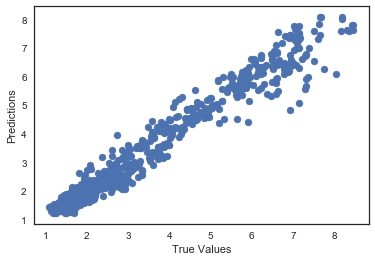

In [34]:
from matplotlib import pyplot as plt

plt.scatter(y_test, y_pred)

plt.xlabel('True Values')
plt.ylabel('Predictions')

In [35]:
import statsmodels.api as sm
import pylab
import statsmodels.formula.api as smf

auto = features_selected_test
est = smf.ols('fertility~all other', auto).fit()
est.summary()

SyntaxError: invalid syntax (<unknown>, line 1)

# Wrapper Methods

Wrapper methods consider the selection of a set of features as a search problem, where different combinations are prepared, evaluated and compared to other combinations. A predictive model us used to evaluate a combination of features and assign a score based on model accuracy.

The search process may be methodical such as a best-first search, it may stochastic such as a random hill-climbing algorithm, or it may use heuristics, like forward and backward passes to add and remove features.

An example if a wrapper method is the recursive feature elimination algorithm.



![alt text](Wrapper_1.webp)

In [ ]:
from sklearn.feature_selection import RFE

In [ ]:
rfe = RFE(lm, n_features_to_select=10)
rfe.fit(features_selected_train,y_train)

In [ ]:
def ranking(ranks, names, order=1):

    ranks = map(lambda x: round(x,2), ranks)
    return list(sorted(zip(ranks, names),reverse=True))

In [ ]:
rankings = ranking(np.abs(lm.coef_), features_selected_train.columns)

In [ ]:
rankings[:15]

In [ ]:
[item[1] for item in rankings[0:15]]


In [ ]:
final_columns = [item[1] for item in rankings[0:15]]


In [ ]:
lm = linear_model.LinearRegression()
model = lm.fit(features_selected_train[final_columns], y_train)

In [ ]:
features_selected_test = features_135_test[final_columns]
y_pred = lm.predict(features_selected_test)

print(metrics.mean_absolute_error(y_test, y_pred))
print(metrics.mean_squared_error(y_test, y_pred))
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

print(model.score(features_selected_test, y_test))


# Embedded Methods

Embedded methods learn which features best contribute to the accuracy of the model while the model is being created. The most common type of embedded feature selection methods are regularization methods.

Regularization methods are also called penalization methods that introduce additional constraints into the optimization of a predictive algorithm (such as a regression algorithm) that bias the model toward lower complexity (fewer coefficients).

Examples of regularization algorithms are the LASSO, Elastic Net and Ridge Regression.

![alt text](Embedded_1.webp)